In [98]:
%load_ext autoreload
%autoreload 2

import os
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

from sklearn import preprocessing

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from xgboost.sklearn import XGBRegressor
from xgboost import cv

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

from functions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## To Do:

- Compute Propensity Scores using NN model using Keras 
- Compute Outcome Regression Predictions using Ridge Regression on featurized data? 
- Look at some cross validation scores accross different datasets - DONE

# Building Some Models

## NN

In [41]:
# MLP Regressor 
data_num = 10
y, X, cf_X = reformat_data_2(data_num)
model_NN = MLPRegressor(hidden_layer_sizes = (20, 40, 20), max_iter = 1000)
model_NN.fit(X,y)
print("NN RMSE", mse(y, model_NN.predict(X), squared = False))
y_cf = model_NN.predict(cf_X)
# compute_SATT(data_num, y_cf)

NN RMSE 147.16002456517288


In [80]:
# GridSearchCV
#https://stats.stackexchange.com/questions/181
# input layer size is 24 columns 


y, X, cf_X = reformat_data(data_num)

model_NN_CV = MLPRegressor(max_iter = 500)

params = {'activation': ['relu', 'tanh'],
          'hidden_layer_sizes': [(20, 20, 20), (20, 40, 20)],
          'solver': ['adam', 'sgd'],
          'learning_rate' : ['adaptive'],
          'alpha': [0.1, 0.01],
         }

clf = GridSearchCV(model_NN_CV, params, scoring = 'neg_mean_squared_error', n_jobs=-1, verbose = 2)
clf.fit(X, y)

In [66]:
clf.best_params_

# test1: 
# {'activation': 'relu',
# 'alpha': 0.001,
# 'hidden_layer_sizes': (20, 20, 20),
# 'learning_rate': 'adaptive',
# 'solver': 'adam'}

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (20, 20, 20),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [ ]:
print("RMSE", np.sqrt(-clf.best_score_))

## XGBoost

In [79]:
data_num = 10
y, X, cf_X = reformat_data_2(data_num)

xgb_r = XGBRegressor(objective = 'reg:squarederror', n_jobs = 8)

params = {"n_estimators":[25, 75, 100],
    "learning_rate"    : [0.05, 0.15, 0.25],
    "max_depth"        : [ 3, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ]}
#     "gamma"            : [ 0.0, 0.2, 0.4],
#     "colsample_bytree" : [ 0.3, 0.5, 0.7] }

clf = GridSearchCV(xgb_r, params, scoring = 'neg_mean_squared_error', n_jobs=-1, verbose = 10)
clf.fit(X, y)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=N

In [80]:
clf.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100}

In [81]:
print("RMSE: ", np.sqrt(-clf.best_score_))

RMSE:  147.8861873287253


In [59]:
y, X, cf_X = reformat_data(10)
xgb_r = XGBRegressor(objective = 'reg:squarederror', n_estimators = 100, n_jobs = 8)
xgb_r.fit(X, y)
mse(y, xgb_r.predict(X), squared = False)

19.63449310989392

## Model Diagnostics

Average of CV RMSE across 50 datasets:  151.21384187690478
Standard Deviation of CV RMSE across 50 datasetes: 6.633860156626346


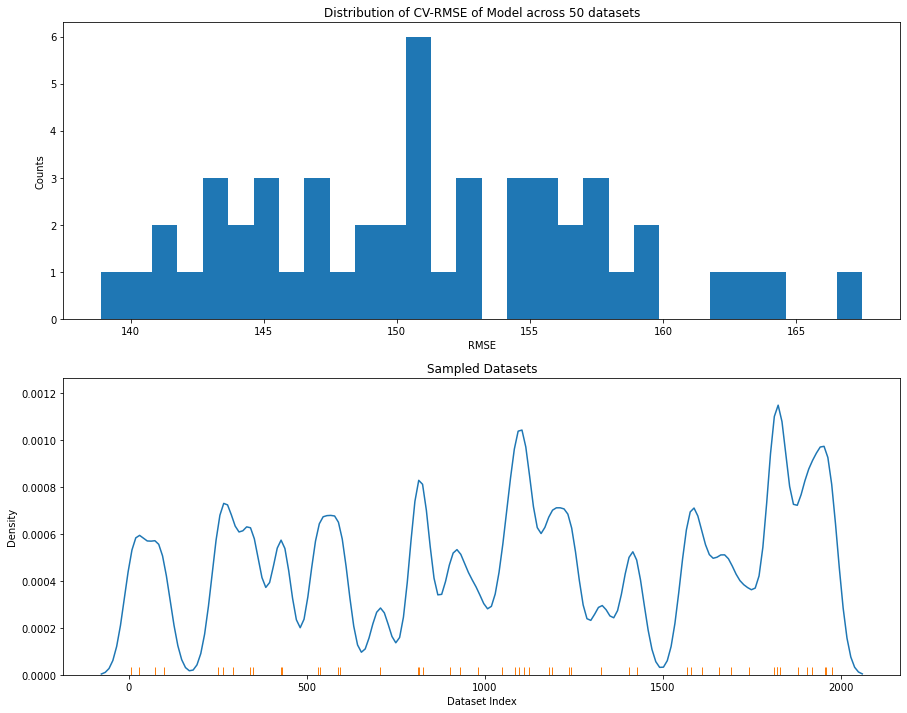

In [83]:
test_model(LinearRegression())

Average of CV RMSE across 50 datasets:  149.70474992010574
Standard Deviation of CV RMSE across 50 datasetes: 5.896843579739163


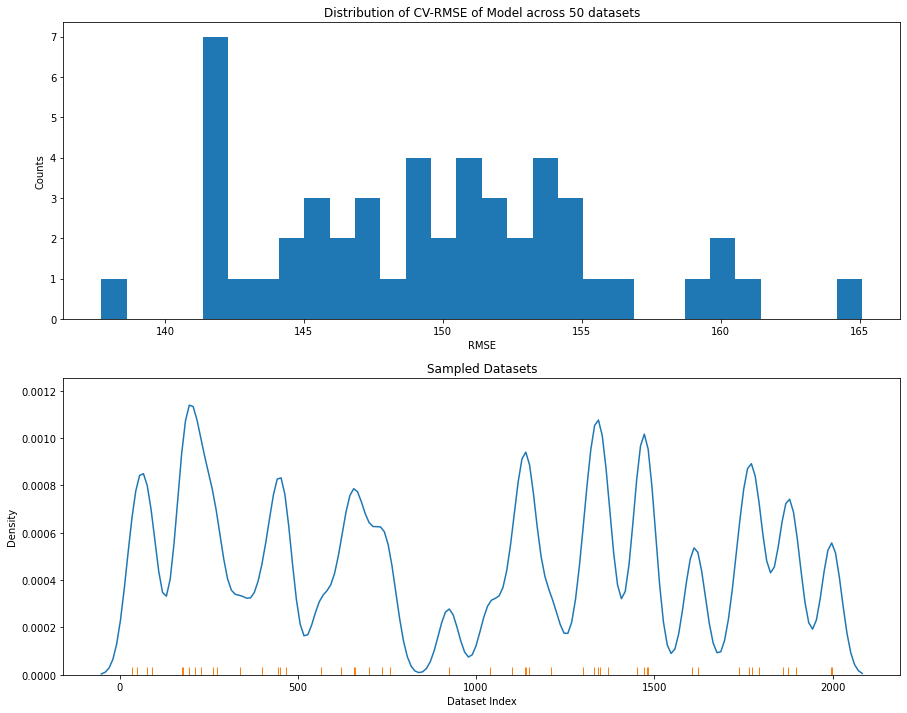

In [66]:
test_model(Ridge(alpha = 10))

Average of CV RMSE across 3 datasets:  158.4808978838947
Standard Deviation of CV RMSE across 3 datasetes: 6.495600967073445


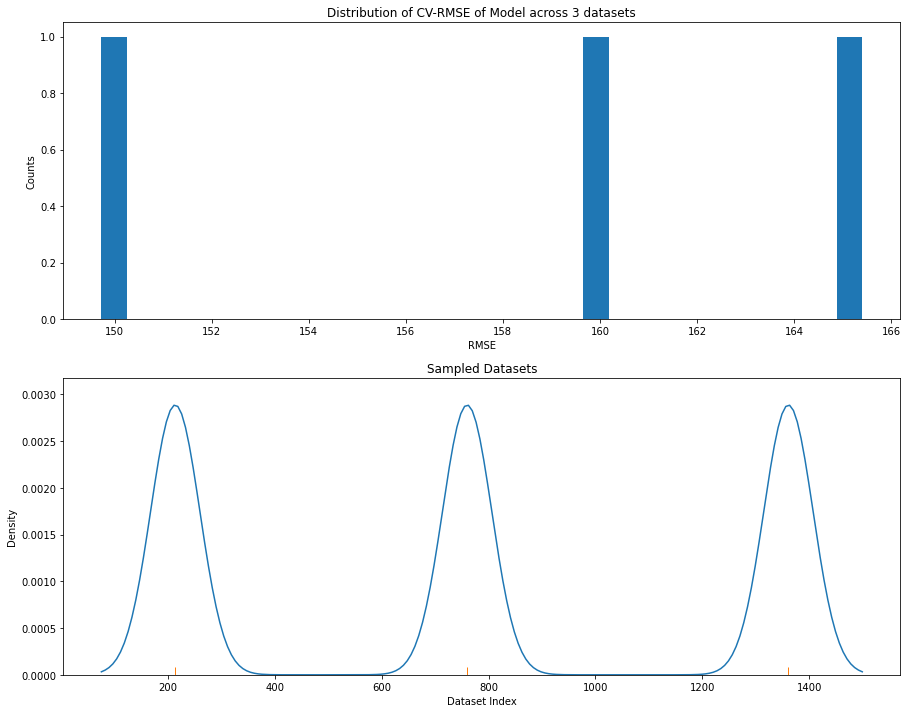

In [86]:
model_NN = MLPRegressor(hidden_layer_sizes = (20, 40, 20), 
                        max_iter = 1000,
                        activation = 'relu',
                        alpha = 0.1,
                        learning_rate = 'adaptive',
                        solver = 'adam')
test_model(model_NN, 3)

Average of CV RMSE across 20 datasets:  153.48243630161772
Standard Deviation of CV RMSE across 20 datasetes: 6.060257033405635


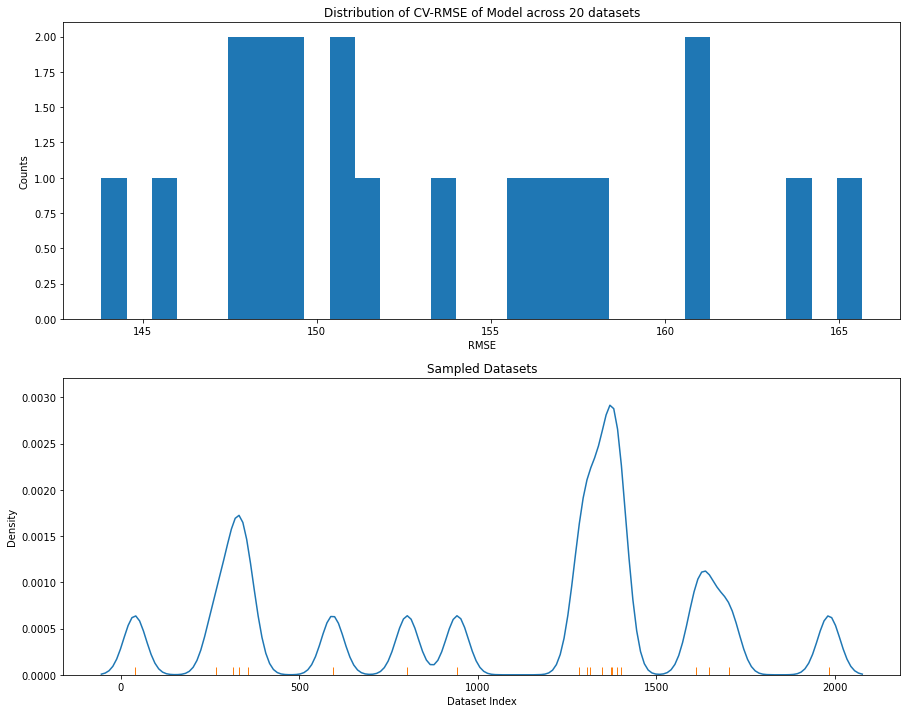

In [87]:
xgb_r = XGBRegressor(objective = 'reg:squarederror', 
                     max_depth = 3, 
                     learning_rate = 0.05,
                     n_estimators = 100, 
                     min_child_weight = 5)
test_model(xgb_r, 20)

## Visuals of SATT

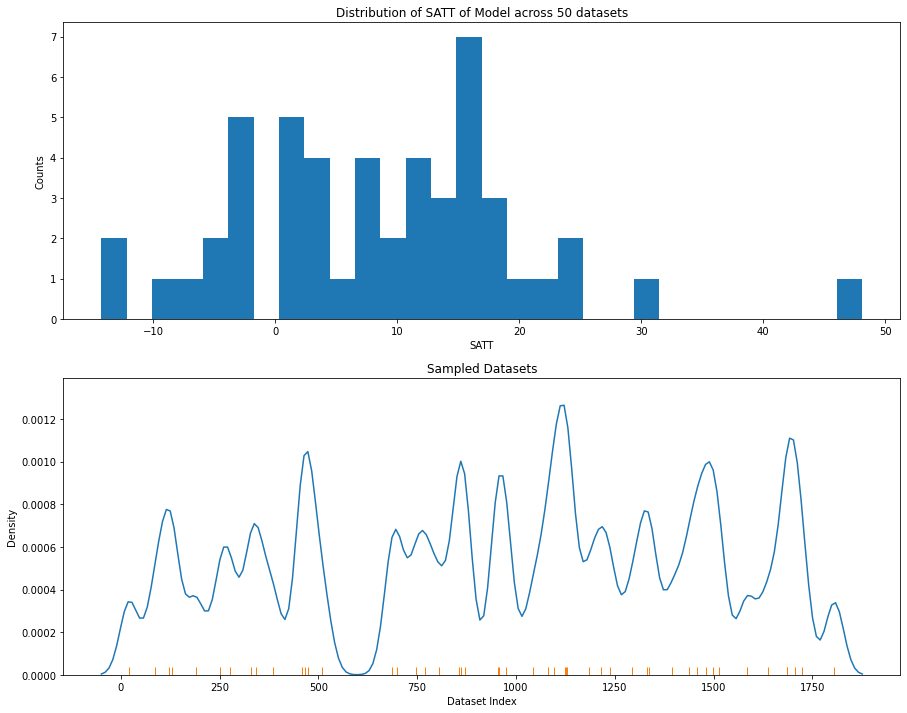

In [112]:
SATT_model_predictions(LinearRegression(), samples = 50, seed = 42)

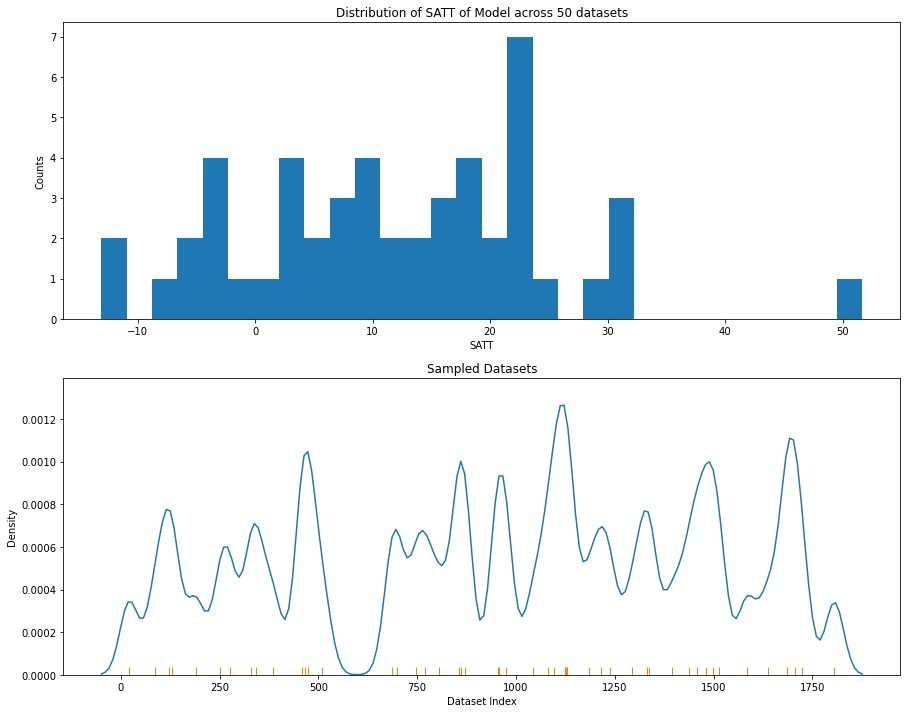

In [111]:
SATT_model_predictions(Ridge(alpha = 10), samples = 50, seed = 42)

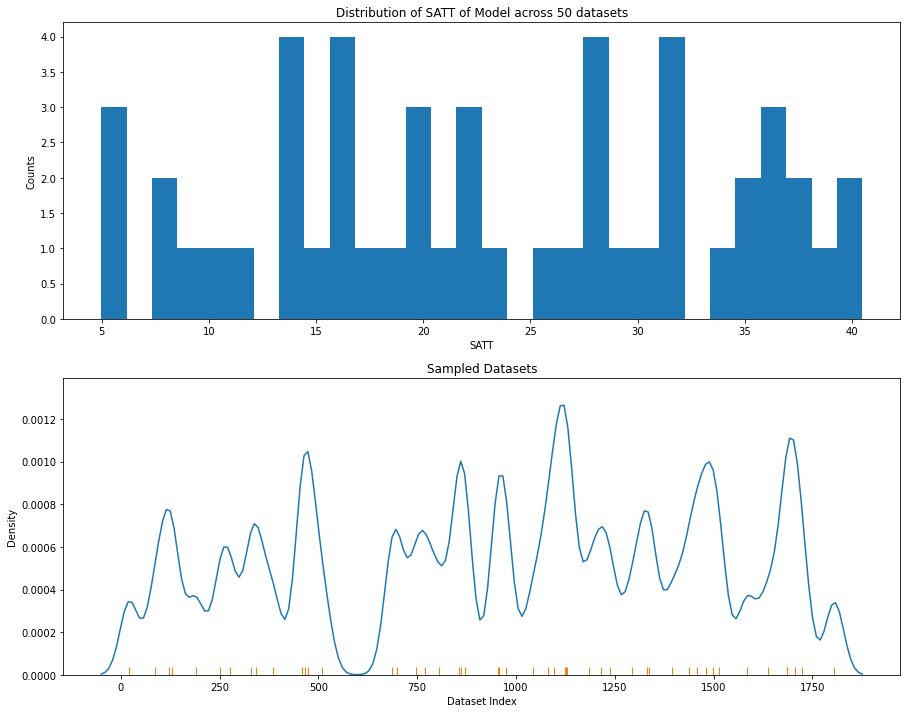

In [113]:
xgb_r = XGBRegressor(objective = 'reg:squarederror', 
                     max_depth = 3, 
                     learning_rate = 0.05,
                     n_estimators = 100, 
                     min_child_weight = 5)

SATT_model_predictions(xgb_r, samples = 50, seed = 42)